In [1]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

import fresh as fresh
import recycle as recycle

from qiskit_ibm_runtime import QiskitRuntimeService 
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit.transpiler import generate_preset_pass_manager

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve backend

In [55]:

service = QiskitRuntimeService()
# backend = service.least_busy(
#     simulator=False, operational=True, min_num_qubits=100
# )
backend = FakeTorino()
print(f"Selected backend: {backend.name}")
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
 

Selected backend: fake_torino


# FRESH 

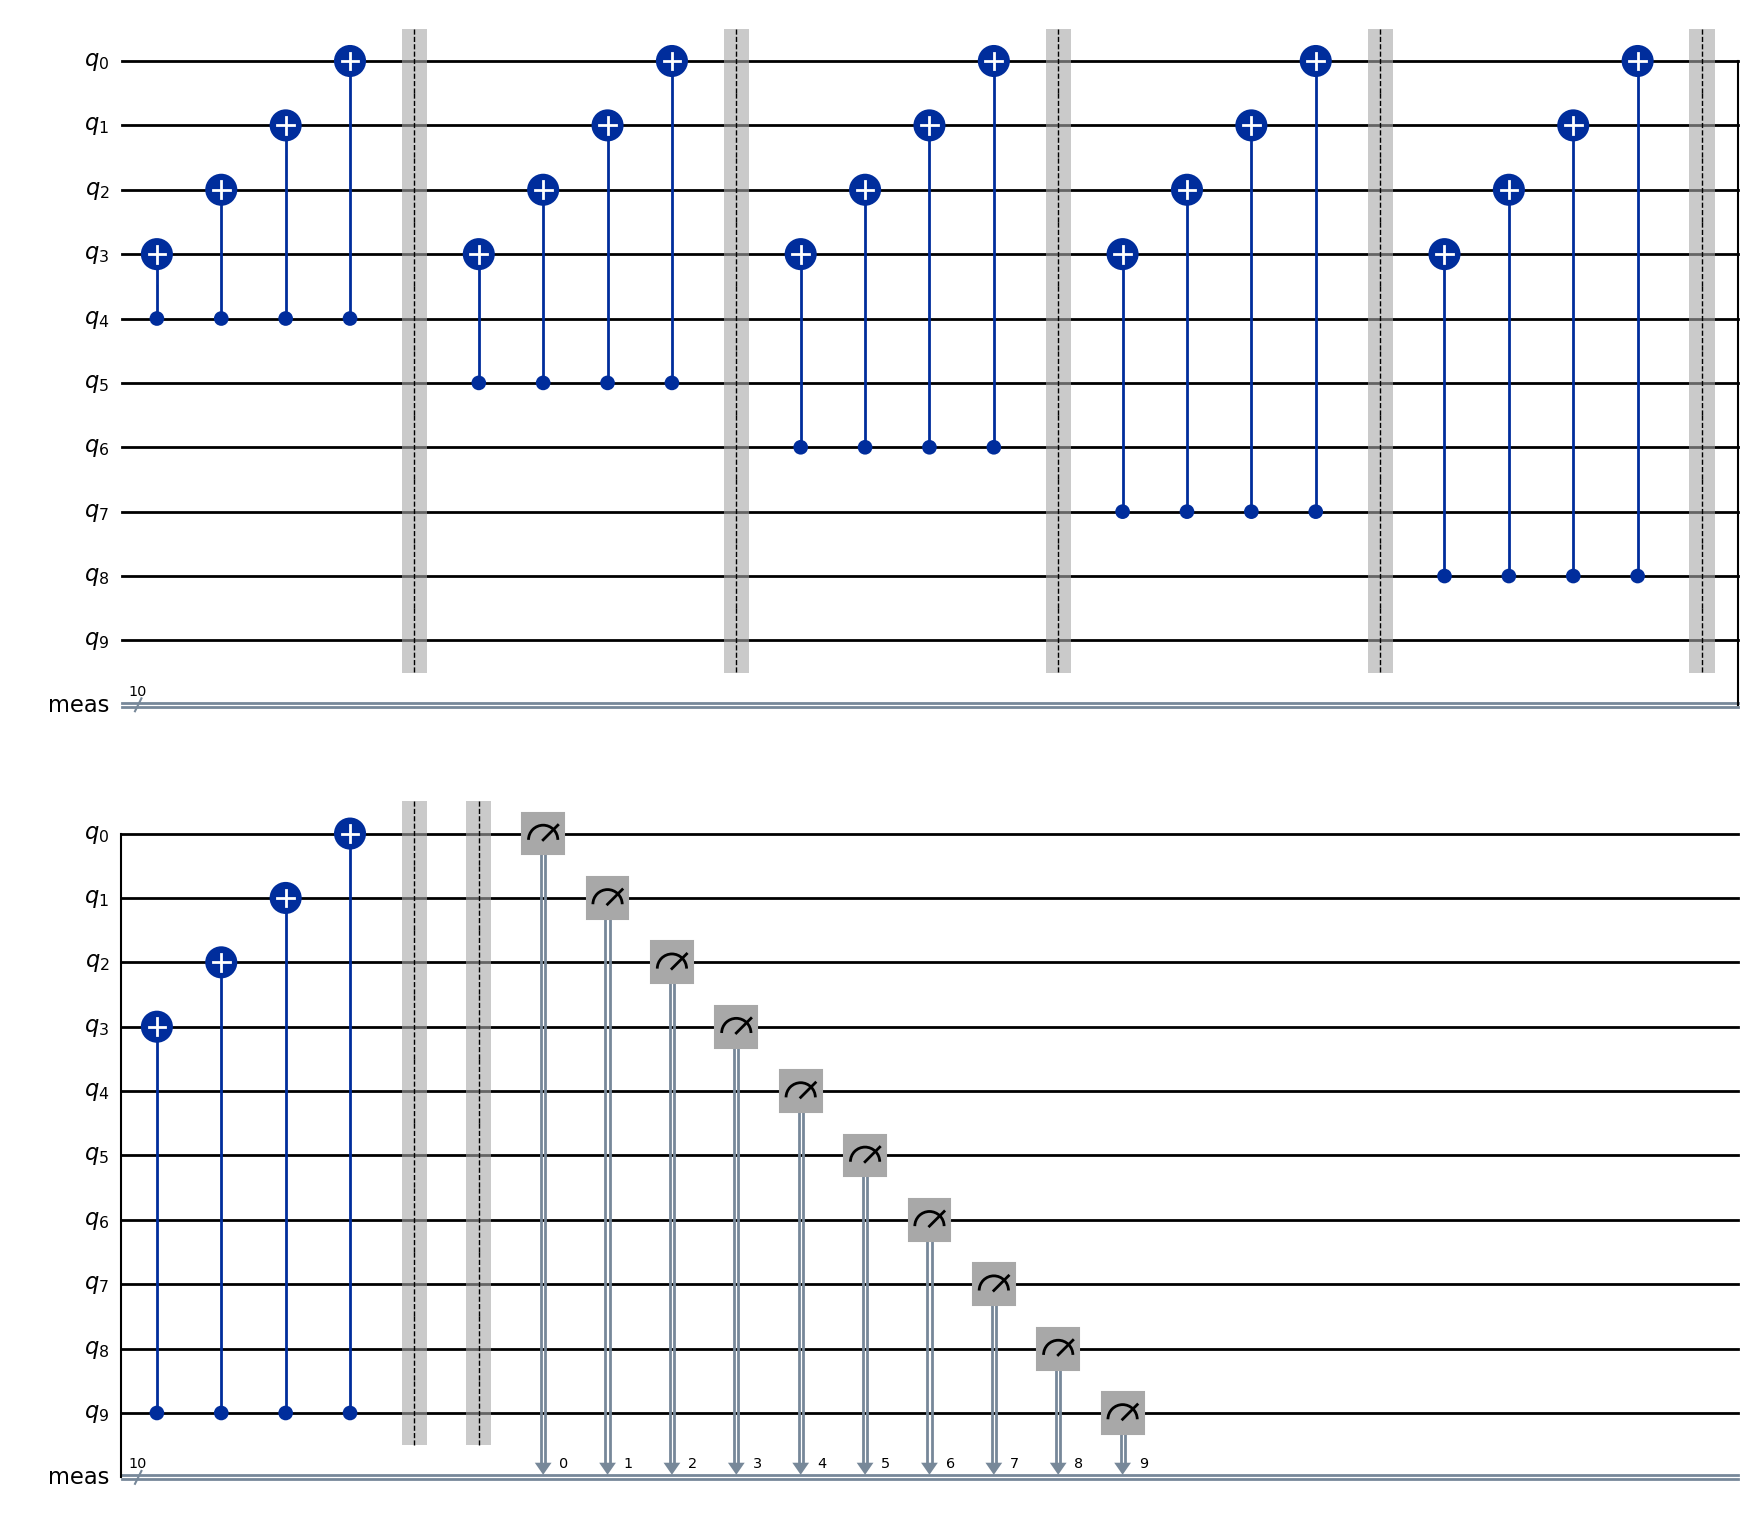

In [52]:
n=6
fresh_circ = fresh.generate_circuit(n=n)
fresh_circ.draw("mpl")

In [57]:
shots = 10000
iters = 7
results_0fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=0)

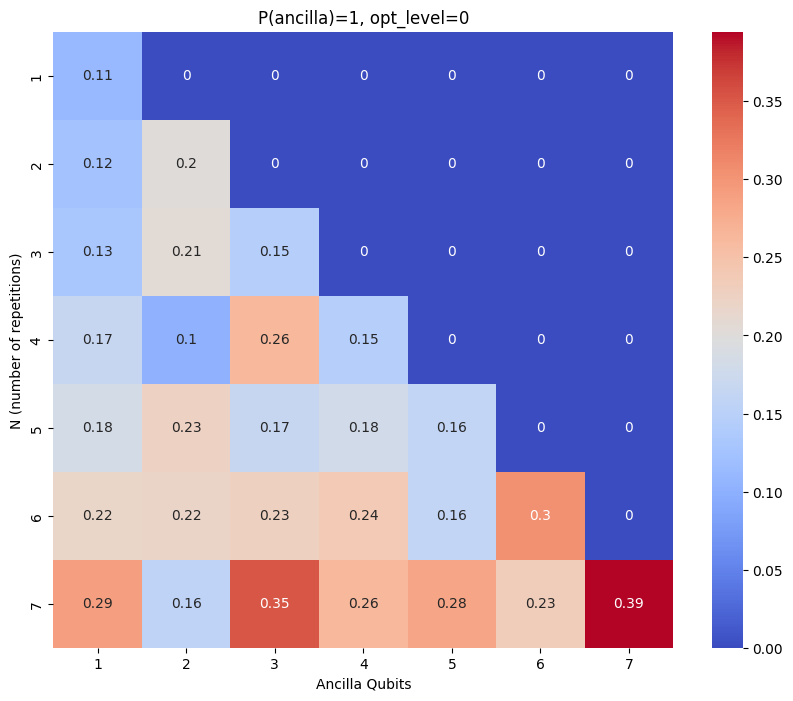

In [58]:
fresh.plot_heatmap(results_0fr, 0)

In [59]:
e0 = fresh.plag_error_rate(results_0fr, iters)
print(e0)

0.0404


In [27]:
opt_level = 1
results_1fr = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

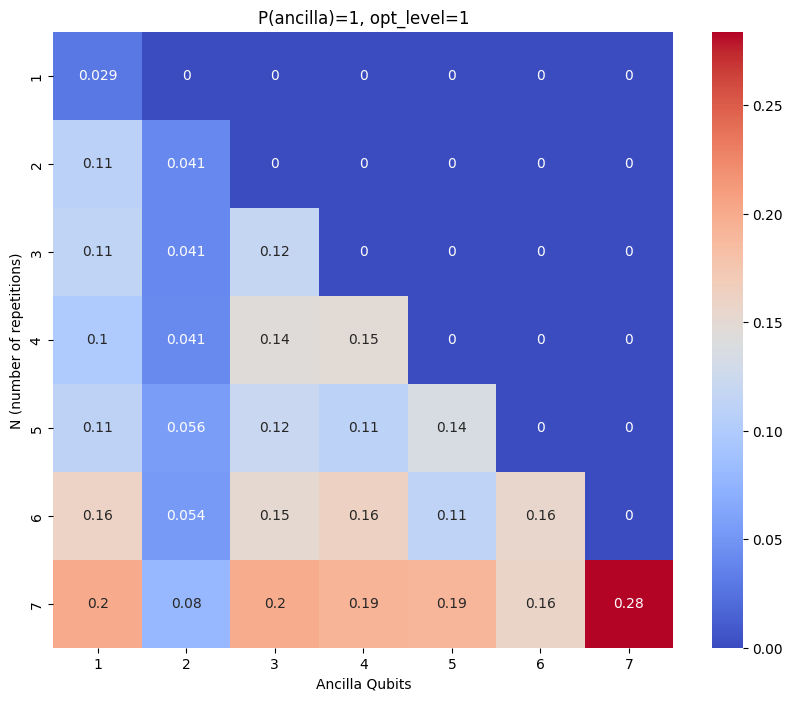

In [7]:
fresh.plot_heatmap(results_1fr, opt_level)

In [64]:
e1 = fresh.plag_error_rate(results_1fr, iters)
print(e1)

0.032


In [8]:
opt_level = 2
results_2 = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

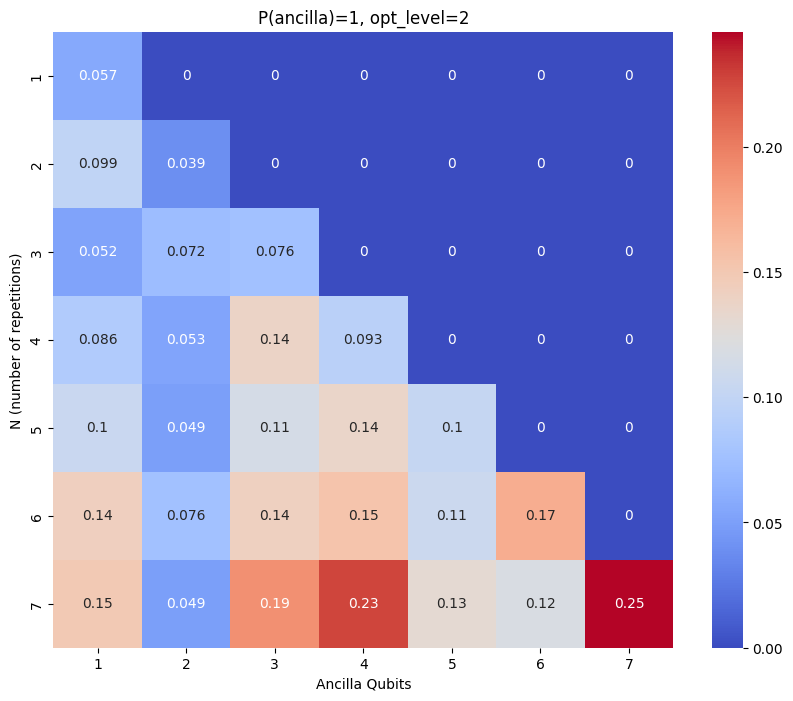

In [9]:
fresh.plot_heatmap(results_2, opt_level)

In [10]:
e2 = fresh.plag_error_rate(results_2, iters)
print(e2)

0.027


In [11]:
opt_level = 3
results_3 = fresh.get_ancilla_probabilities(iters=iters, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=opt_level)

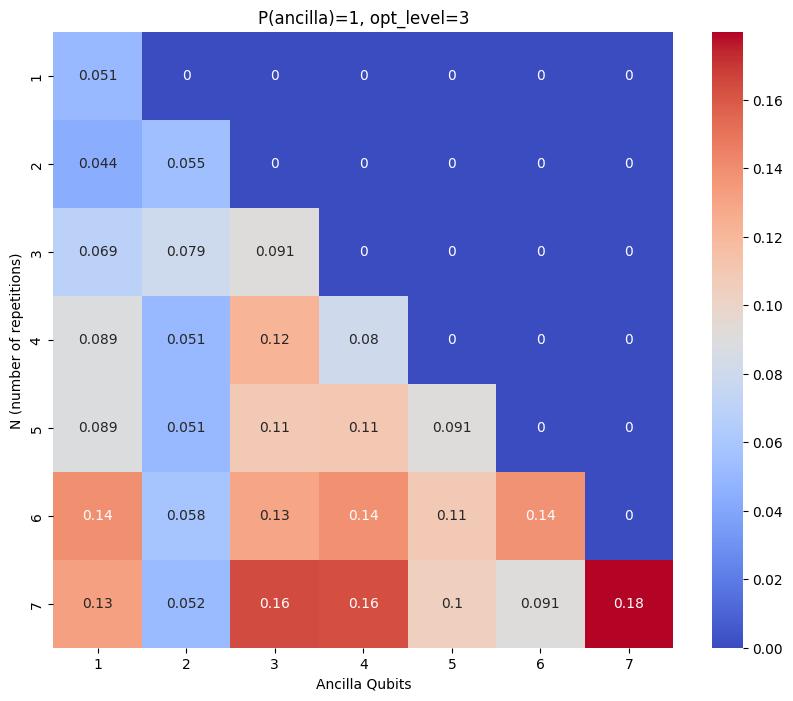

In [12]:
fresh.plot_heatmap(results_3, opt_level)


In [13]:
e3 = fresh.plag_error_rate(results_3, iters)
print(e3)

0.0185


# RECYCLE

In [61]:
shots = 10000
n = 7 
results_0re = recycle.get_ancilla_probabilities(iters=n, 
                                          shots=shots, 
                                          backend=backend,
                                          optimization_level=0)
print(results_0re)

[0.0607, 0.0621, 0.0998, 0.1023, 0.1037, 0.1261, 0.1419]


/u/14/doh6/data/Documents/qt-native-gate-optimization/recycle.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


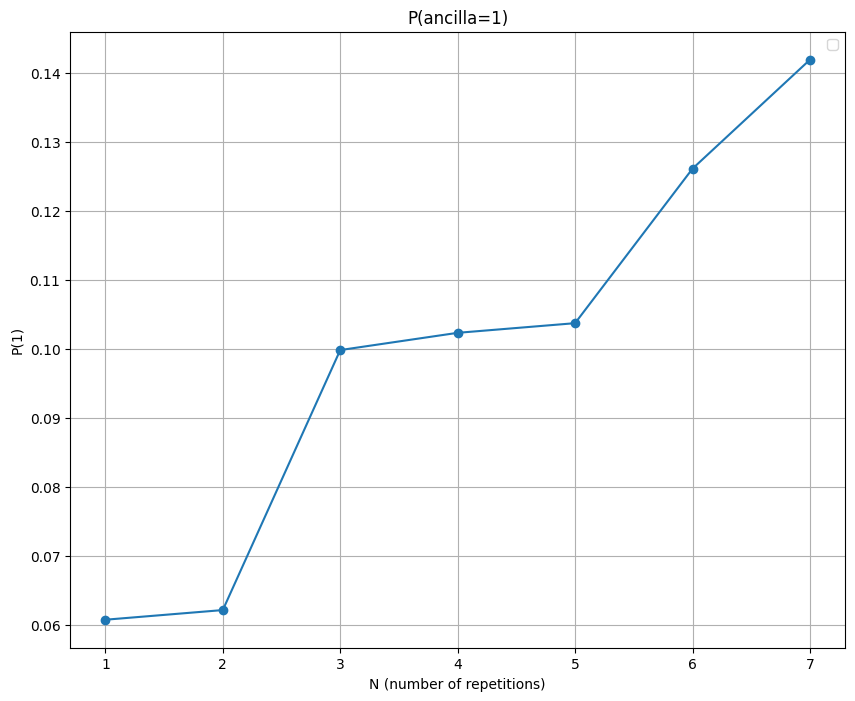

In [62]:
recycle.plot(results_0re)


In [63]:
corr = recycle.corr_err(results_0fr, results_0re, iters)
print(corr)

-0.13840000000000002
-0.14995000000000003
-0.1547055555555556
-0.1582805555555556
-0.1654165555555556
-0.17243322222222227
-0.024633317460317466


In [64]:
plag_recycle = recycle.plag_error_rate(corr,results_0re, iters)
print(plag_recycle)

0.0327


In [65]:
print(e0)

0.0404
